# Importing all the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading the data and viewing the first 10 data in the training set

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [3]:
train.head(6)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319.0


# Info of the data

In [4]:
print("**************** Train *****************")
train.info()
print("**************** Test *****************")
test.info()

**************** Train *****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137

In [5]:
print("**************** Identifying categorical and numerical variables *****************")
train.columns

**************** Identifying categorical and numerical variables *****************


Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

# Checking for Missing and duplicate values

In [6]:
print("**************** Check for Train Duplicates *****************")
train.duplicated().sum()
print("**************** Check for Test Duplicates  *****************")
test.duplicated().sum()

**************** Check for Train Duplicates *****************
**************** Check for Test Duplicates  *****************


0

No duplicate data. Now let's check for any missing datapoints

In [7]:
train.isnull().sum().sum()

0

Great! No missing values

In [8]:
## View Integer type columns
train.describe(include=[np.number])

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [9]:
## Categorical Columns
train.describe(include=['O'])

,Open Date,City,City Group,Type
count,137,137,137,137
unique,134,34,2,3
top,01/07/2000,İstanbul,Big Cities,FC
freq,2,50,78,76


So we have 4 categorical features and 39 numerical columns

# Data Statistics

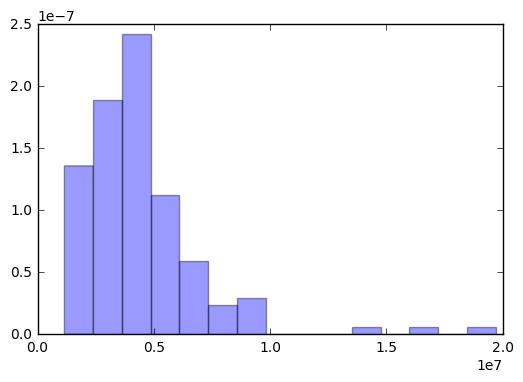

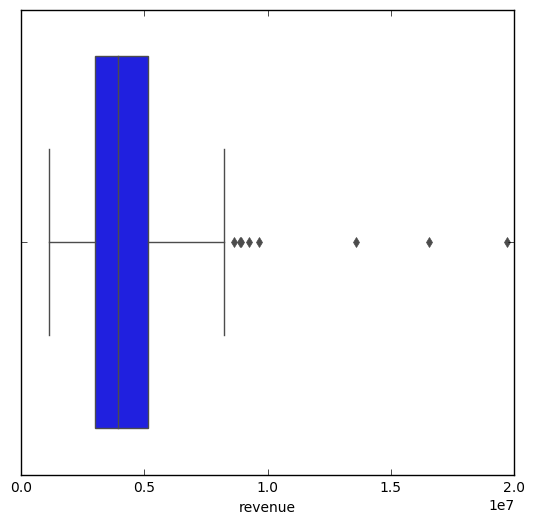

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train.revenue)
plt.show()

# Identifying potential outliers

In [13]:
rev_stat=train.revenue.describe()
print(rev_stat)
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64
The upper and lower bounds for suspected outliers are -252282.5 and 8417985.5


# Checking the potential outliers

In [15]:
#potential outliers above 8417985.5
train[train.revenue>8417985.5]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
24,24,09/20/2009,İstanbul,Big Cities,IL,5,5.0,3.0,5.0,2,...,2.0,5,5,4,4,4,4,5,2,8904084.0
49,49,04/01/2008,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,...,7.5,0,0,0,0,0,0,0,0,8630682.0
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0
100,100,09/21/2007,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9652350.0
116,116,03/30/2012,İzmir,Big Cities,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,8894598.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0


# Splitting the opening date by month and year

In [27]:
train_date=train['Open Date'].str.split('/', n = 2, expand = True)
train['month']=train_date[0]
train['days']=train_date[1]
train['year']=train_date[2]
train['month'].head(5)

0    07
1    02
2    03
3    02
4    05
Name: month, dtype: object

# Identifying correlations between Revenues and other features

In [45]:
def labelEncoding(df,col):
    dict_cat={}
    cats=df[col].cat.categories.tolist()
    train['revenue']=train['revenue'].astype('int64')
    for c in cats:
        dict_cat[c]=train[train[col]==c]['revenue'].mean()
    df[col]=df[col].map(dict_cat)    


In [46]:
for col in train.columns:
    if not train[col].dtype.name=='int64':  
        train[col]=train[col].astype('category')
        labelEncoding(train,col)      

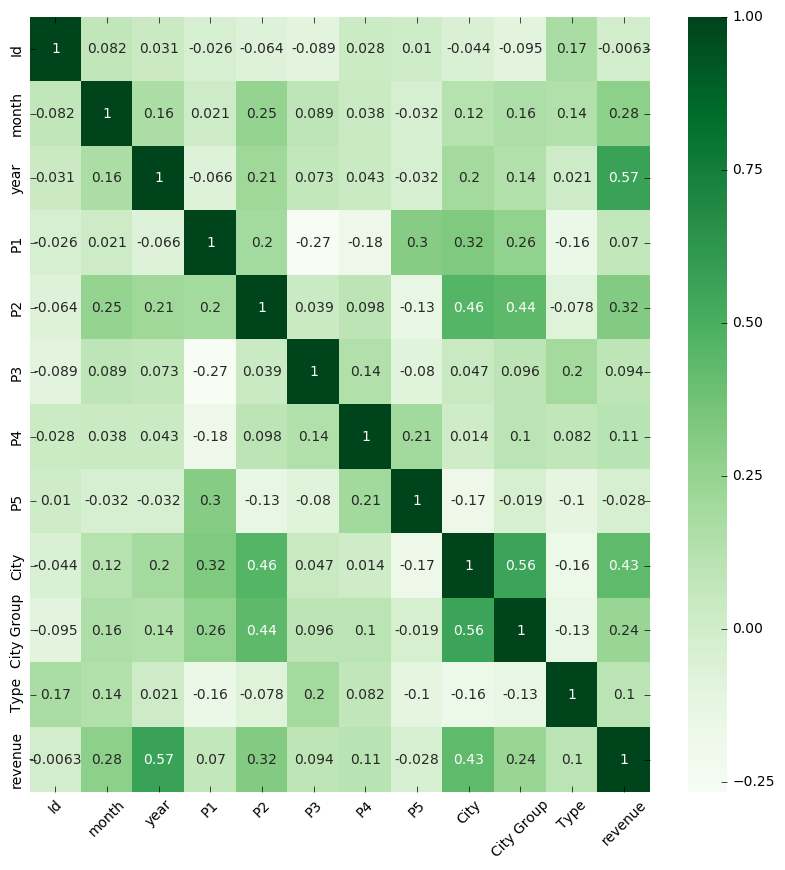

In [48]:
fig=plt.figure(figsize=(10,10))
features=['Id','month','year','P1','P2','P3','P4','P5','City','City Group','Type']
sns.heatmap(train[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()

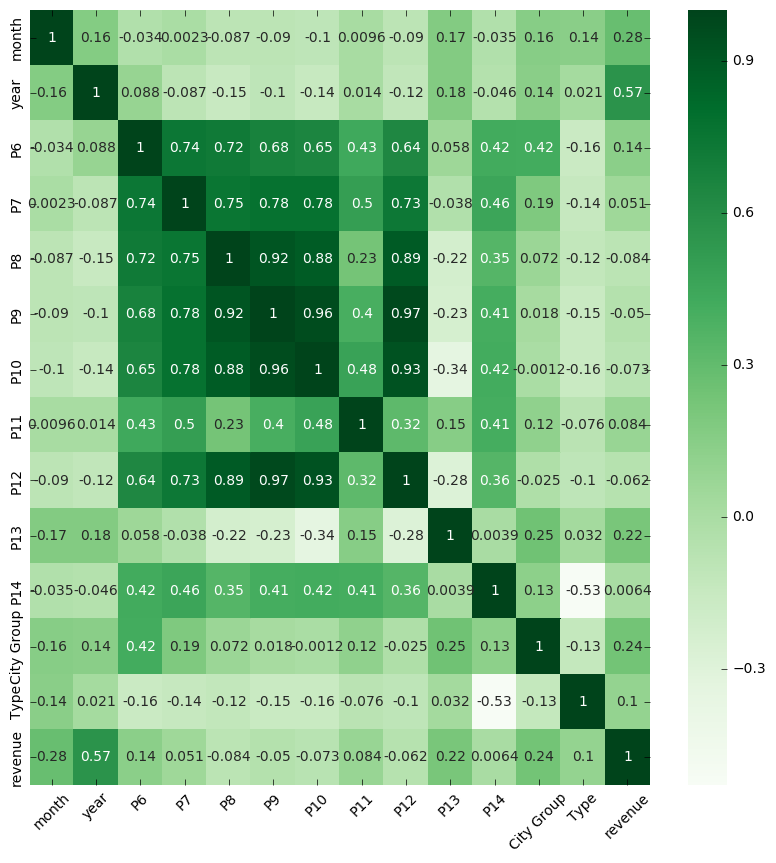

In [49]:
fig=plt.figure(figsize=(10,10))
features=['month','year','P6','P7','P8','P9','P10','P11','P12','P13','P14','City Group','Type']
sns.heatmap(train[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()

In [60]:
def featurePlot(col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(x=col,y='revenue',data=train)
    plt.xticks(rotation=60)
    plt.ylabel('Revenues')
    plt.subplot(1,2,2)
    mean=train.groupby(col)['revenue'].mean()
    train[col]=train[col].astype('category')
    level=mean.sort_values().index.tolist()
    train[col].cat.reorder_categories(level,inplace=True)
    train[col].value_counts().plot()
    plt.xticks(rotation=60)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()

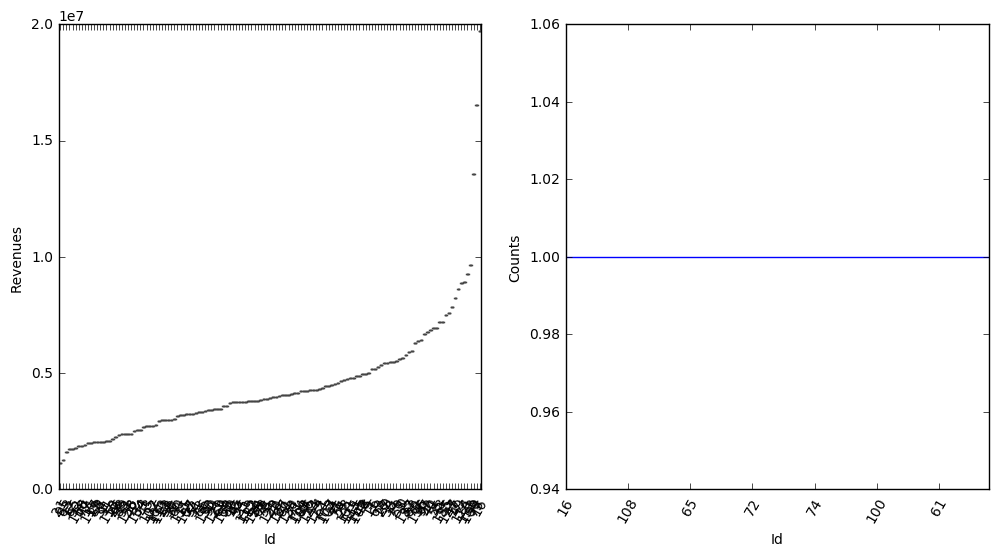

In [61]:
featurePlot('Id')

No clear association between Id and revenue. So this feature can add as a noise.

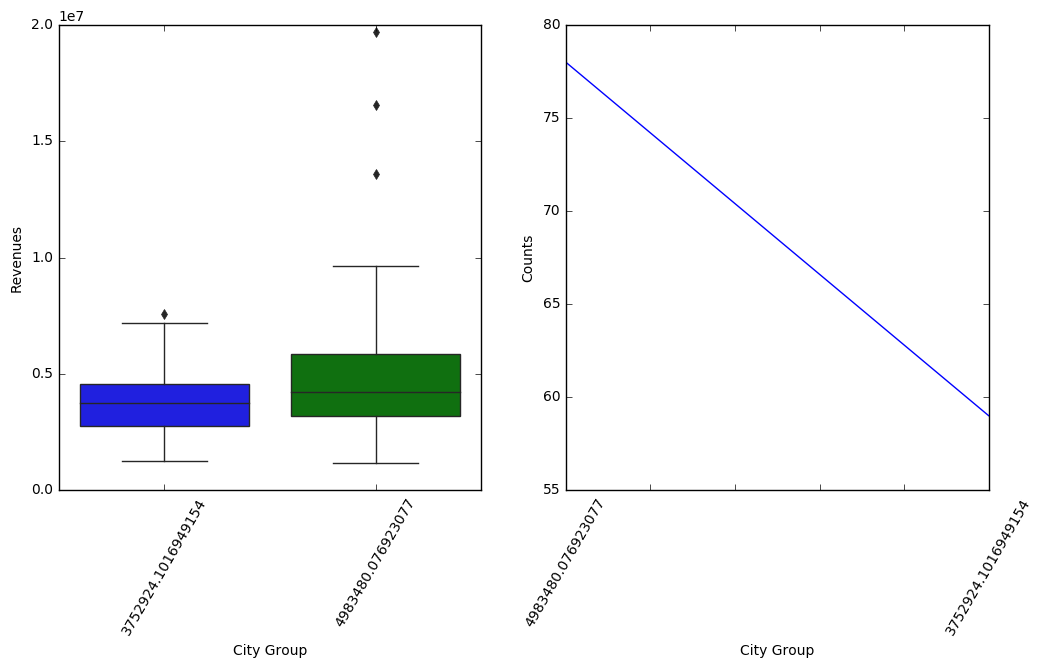

In [62]:
featurePlot('City Group')

Strong correlation betwen City Group and Revenue. 